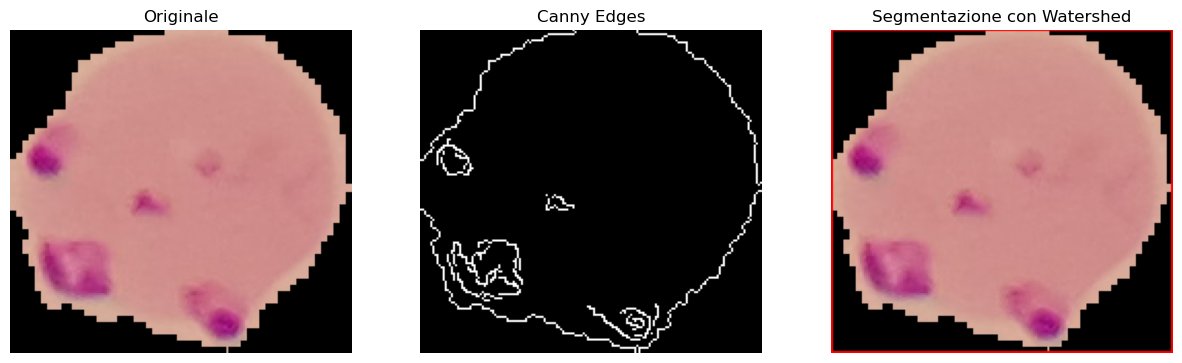

In [4]:
# Importa le librerie necessarie
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Carica l'immagine
image = cv2.imread('FESI/Progetto/malaria/malaria/parasite (109).png') 
original = image.copy()
# Converti l'immagine in scala di grigi
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Applica il rilevamento dei bordi (Canny Edge Detection)
edges = cv2.Canny(gray, threshold1=50, threshold2=150)
# Usa operazioni morfologiche per migliorare i bordi
kernel = np.ones((3, 3), np.uint8)
dilated_edges = cv2.dilate(edges, kernel, iterations=1)
# Trova i marcatori per il watershed
ret, markers = cv2.connectedComponents(dilated_edges)
# Incrementa i marcatori per distinguere lo sfondo
markers = markers + 1
# Applica il watershed
markers = cv2.watershed(image, markers)
# Segna i bordi rilevati
image[markers == -1] = [0, 0, 255]  # Bordo in rosso
# Visualizza i risultati
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
axs[0].set_title('Originale')
axs[1].imshow(edges, cmap='gray')
axs[1].set_title('Canny Edges')
axs[2].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[2].set_title('Segmentazione con Watershed')
for ax in axs:
    ax.axis('off')
plt.show()    